In [1]:
!pip install realesrgan

  Using cached basicsr-1.4.2-py3-none-any.whl
  Using cached facexlib-0.3.0-py3-none-any.whl (59 kB)
  Using cached gfpgan-1.3.8-py3-none-any.whl (52 kB)
  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached addict-2.4.0-py3-none-any.whl (3.8 kB)
  Using cached future-0.18.3-py3-none-any.whl
  Using cached lmdb-1.4.1-cp310-cp310-win_amd64.whl (100 kB)
  Using cached scikit_image-0.21.0-cp310-cp310-win_amd64.whl (22.8 MB)
  Using cached tb_nightly-2.14.0a20230625-py3-none-any.whl (5.6 MB)
  Using cached yapf-0.40.1-py3-none-any.whl (250 kB)
  Using cached filterpy-1.4.5-py3-none-any.whl
  Using cached imageio-2.31.1-py3-none-any.whl (313 kB)
  Using cached tifffile-2023.4.12-py3-none-any.whl (219 kB)
  Using cached PyWavelets-1.4.1-cp310-cp310-win_amd64.whl (4.2 MB)
  Using cached tensorboard_data_server-0.7.1-py3-none-any.whl (2.4 kB)
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Unins

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires tensorflow-estimator<2.13,>=2.12.0, but you have tensorflow-estimator 2.11.0 which is incompatible.


In [1]:
import torch
from PIL import Image
import numpy as np
from realesrgan import RealESRGANer
import os
import cv2
from basicsr.archs.rrdbnet_arch import RRDBNet
from basicsr.utils.download_util import load_file_from_url


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)
model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=2)
#netscale = 4
netscale = 2
#file_url = ['https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth']
file_url = ['https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.1/RealESRGAN_x2plus.pth']

#model_path = os.path.join('weights', 'RealESRGAN_x4plus' + '.pth')
model_path = os.path.join('weights', 'RealESRGAN_x2plus' + '.pth')
print(model_path)
if not os.path.isfile(model_path):
        print('not here')
        ROOT_DIR = os.path.dirname(os.path.abspath('realesrgan_test.ipynb'))
        for url in file_url:
            # model_path will be updated
            model_path = load_file_from_url(
                url=url, model_dir=os.path.join(ROOT_DIR, 'weights'), progress=True, file_name=None)

upsampler = RealESRGANer(scale=netscale,model_path=model_path,model=model,half=True)
#model.load_weights('weights/RealESRGAN_x4.pth')

C:\Users\tanin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\transforms\functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(


weights\RealESRGAN_x2plus.pth


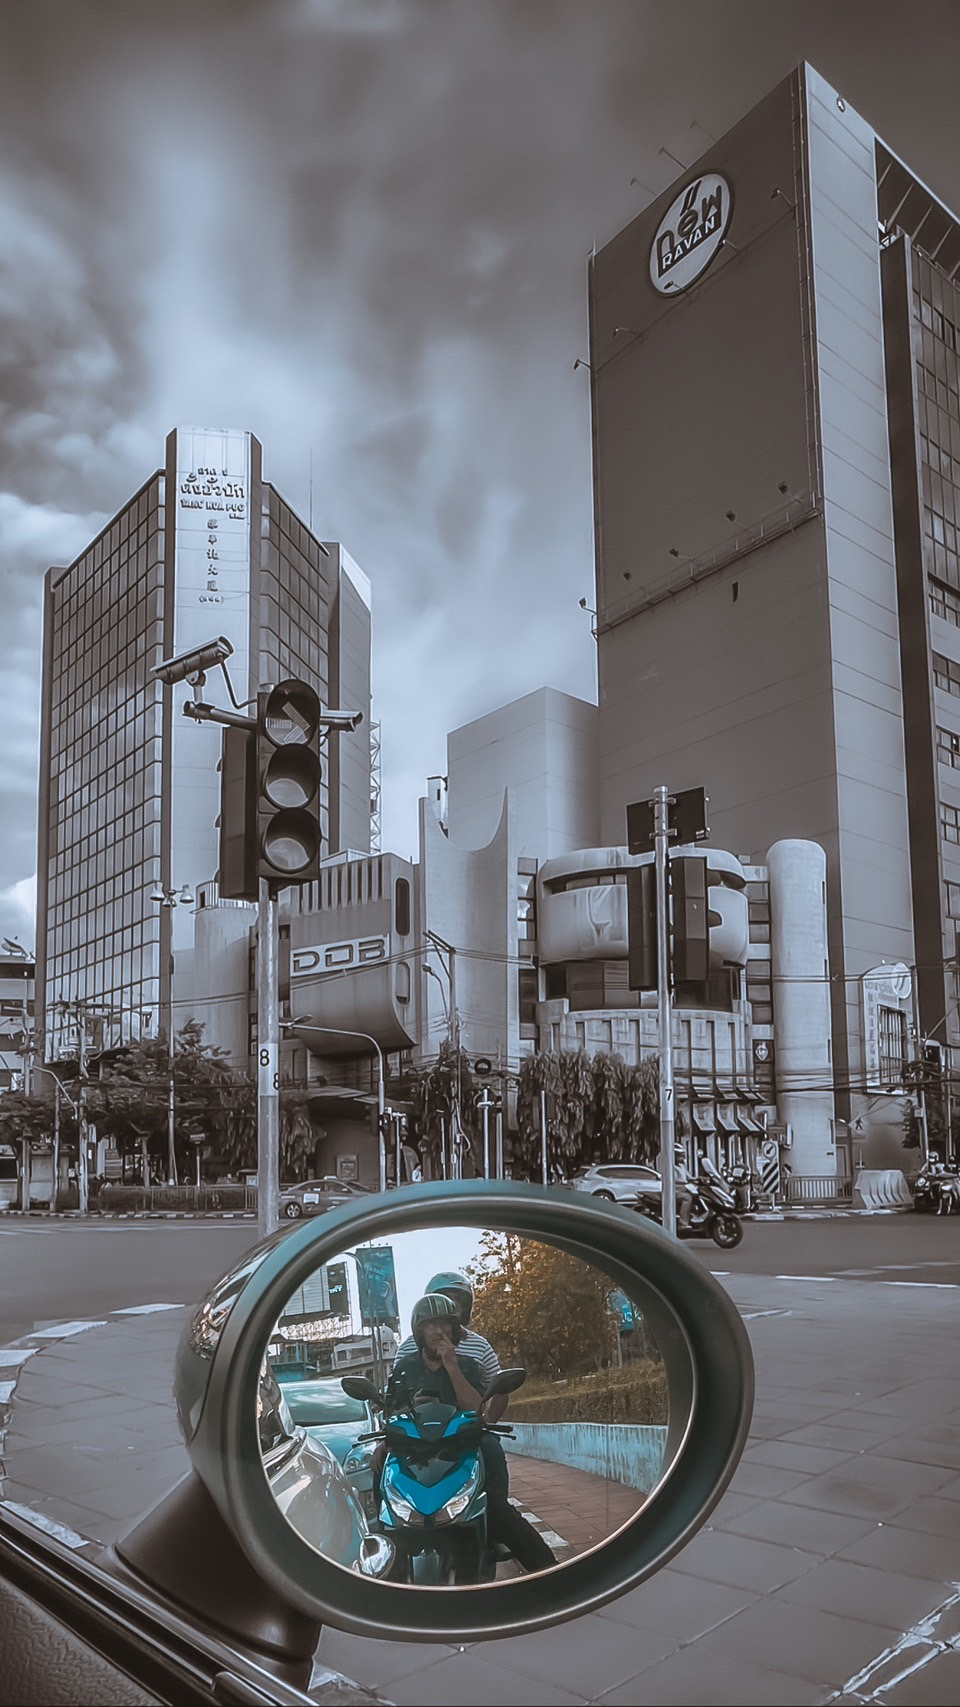

In [8]:

path_to_image = 'inputs/test_iphone4.jpg'
image = Image.open(path_to_image).convert('RGB')
display(image)

img = cv2.imread(path_to_image)

sr_image, _ = upsampler.enhance(img)

In [9]:
cv2.imwrite('results/ouput_image13.png',sr_image)
sr_image = cv2.resize(sr_image, (1024, 1024))
cv2.imshow('image',sr_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


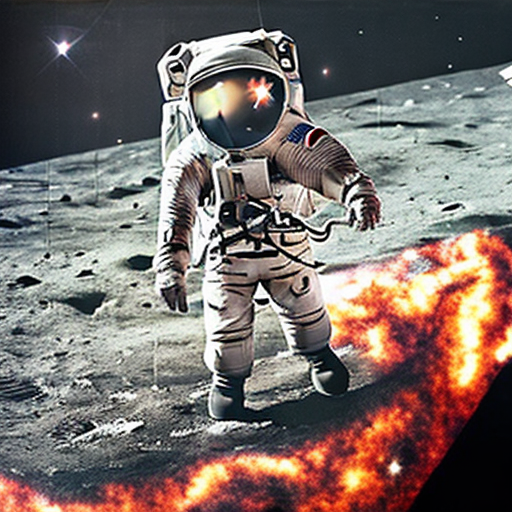

In [4]:
path_to_image = 'inputs/compel_ex2.png'
image = Image.open(path_to_image).convert('RGB')
display(image)

img = cv2.imread(path_to_image)

sr_image, _ = upsampler.enhance(img)

In [5]:
cv2.imwrite('results/ouput_image4.png',sr_image)
sr_image = cv2.resize(sr_image, (1024, 1024))
cv2.imshow('image',sr_image)
cv2.waitKey(0)
cv2.destroyAllWindows()